### 1. Data Pre-processing

#### 1.1 Feature Scaling

- **Feature 1**: Max-Abs Scaling  
  Feature 1 has a sparse data distribution. Max-abs scaling is chosen for this feature because it scales the data to lie within the range of -1 to 1. This method preserves the structure of Feature 1 after scaling, making it an appropriate choice.

- **Feature 2**: Standard Scaling  
  Feature 2 has a relatively high variability within the data distribution. Standard scaling is chosen since it normalizes the data effectively and preserves the structure.


### 2. Learning from data

#### 2.1 Data generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate 100 samples
n_samples = 100

# Generate X values (uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)

# Generate epsilon values (normally distributed with mean 0 and standard deviation 15)
epsilon = np.random.normal(0, 15, n_samples)

# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon[:, np.newaxis]

#### 2.2 Data Visualization

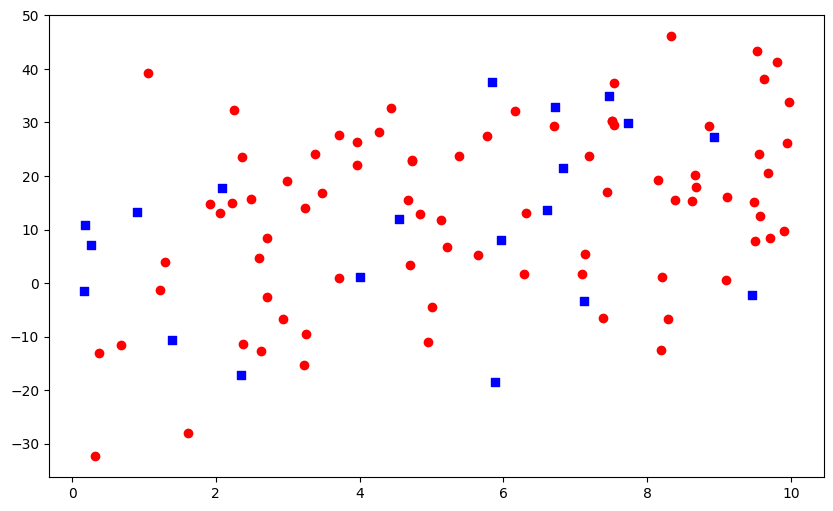

In [2]:
r=np.random.randint(104)

# Split the data into training and test sets (80% train,20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=r)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o',color='red',label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s',color='blue',label='Testing Data')
plt.show()

#### 2.3 Linear Regression

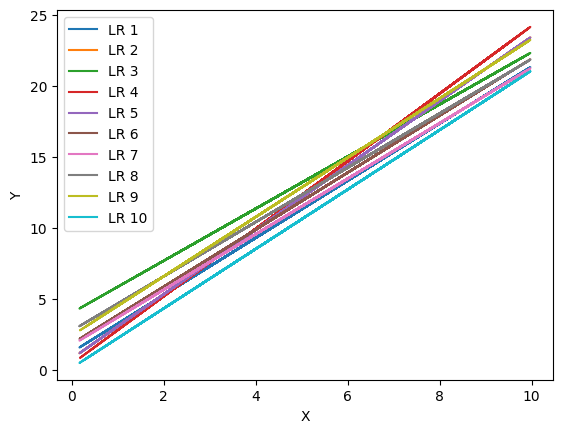

In [3]:
for i in range(10): # Plotting 10 different instances
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=np.random.randint(104))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

- Because, the 100 data points are generated randomly each time, resulting in a different dataset for the model to fit on each instance. Therefore, the linear regression model varies from one instance to another.

#### 2.4 Above tasks for 10,000 data samples,

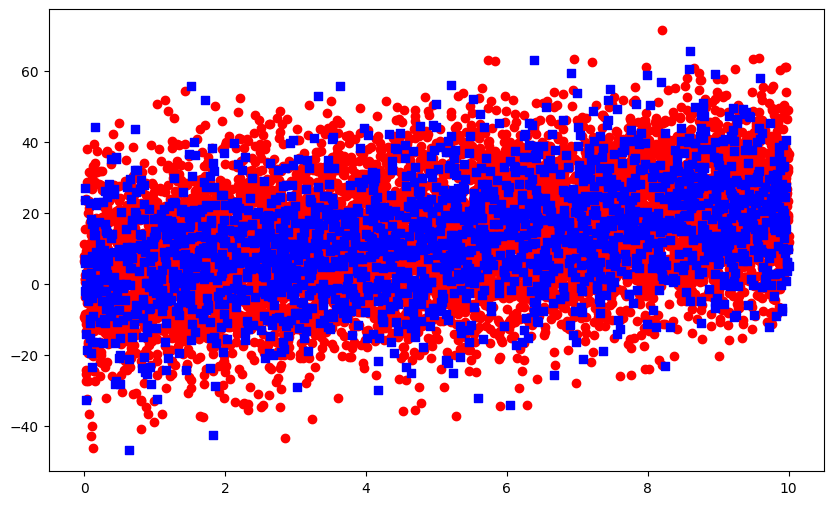

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate 100 samples
n_samples = 10000

# Generate X values (uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)

# Generate epsilon values (normally distributed with mean 0 and standard deviation 15)
epsilon = np.random.normal(0, 15, n_samples)

# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon[:, np.newaxis]

r=np.random.randint(104)

# Split the data into training and test sets (80% train,20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=r)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o',color='red',label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s',color='blue',label='Testing Data')
plt.show()

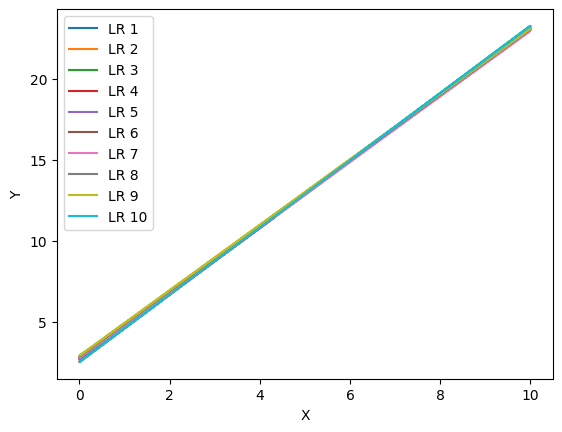

In [5]:
for i in range(10): # Plotting 10 different instances
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=np.random.randint(104))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

- This data generation process creates a uniformly distributed sample between 0 and 10. Since the number of data samples has increased from 100 to 100,000, the dataset has become more generalizable. As a result, in different instances, the datasets are almost identical because they are sampled from the same range with a large number of 100,000 data points. Therefore, the linear regression model remains almost the same across different instances.


### 3. Linear regression on real world data

#### 3.1 Load the dataset

In [6]:
# If package not installed, install it using pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

#### 3.2 Independant and Dependant Variables

In [7]:
print(f"Independaent Variables: {X.shape[1]}")
print(f"Dependaent Variables: {y.shape[1]}")

Independaent Variables: 33
Dependaent Variables: 2


#### 3.3 Possibility to apply linear regression

- No, it is not possible because the dataset has categorical type features.
- In order to apply linear regression to this dataset, we need to use labeling or one-hot encoding like encoding method on this categorical features.  

#### 3.4 Remove NaN/missing values using,

X = X.dropna()<br>
y = y.dropna()

- This approach provided is incorrect because it drops missing values from X and y separately, which can cause a misalignment between the feature set X and the target variable y. If a missing value is dropped in X but not in the corresponding y, or vice versa, the data will no longer match up correctly.

In [8]:
print(f"Number of samples: {X.shape[0]}")

Number of samples: 1020


In [9]:
import pandas as pd

#Removing missing/NaN values
data = pd.concat([X, y], axis=1)
data = data.dropna()

X = data.drop(['aveOralF', 'aveOralM'], axis=1)
y = data[['aveOralF', 'aveOralM']]

Shape after removing missing/NaN values.

In [10]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1018, 33)
y shape: (1018, 2)


#### 3.5 Select features

dependent_feature = 'aveOralM'<br>
independant_features = ['T_atm', 'Humidity', 'T_offset', 'T_RC1', 'Age']

Since 'Age' is a categorical type feature,

In [11]:
# One-hot encode 'Age' feature
X_encoded = pd.get_dummies(X, columns=['Age'], drop_first=True)

# Print the new columns to confirm one-hot encoding
print(X_encoded.head())

   Gender                  Ethnicity  T_atm  Humidity  Distance  T_offset1  \
0    Male                      White   24.0      28.0       0.8     0.7025   
1  Female  Black or African-American   24.0      26.0       0.8     0.7800   
2  Female                      White   24.0      26.0       0.8     0.8625   
3  Female  Black or African-American   24.0      27.0       0.8     0.9300   
4    Male                      White   24.0      27.0       0.8     0.8950   

   Max1R13_1  Max1L13_1  aveAllR13_1  aveAllL13_1  ...   T_Max1    T_OR1  \
0    35.0300    35.3775      34.4000      34.9175  ...  35.6925  35.6350   
1    34.5500    34.5200      33.9300      34.2250  ...  35.1750  35.0925   
2    35.6525    35.5175      34.2775      34.8000  ...  35.9125  35.8600   
3    35.2225    35.6125      34.3850      35.2475  ...  35.7200  34.9650   
4    35.5450    35.6650      34.9100      35.3675  ...  35.8950  35.5875   

   T_OR_Max1  Age_21-25  Age_21-30  Age_26-30  Age_31-40  Age_41-50  \
0  

In [12]:
dependent_feature = "aveOralM"
independent_features = ['T_atm', 'Humidity', 'T_offset1', 'T_RC1'] + [column for column in X_encoded.columns if column.startswith('Age_')]

X_final = X_encoded[independent_features]
y_final = y[dependent_feature]

In [13]:
X_final

,T_atm,Humidity,T_offset1,T_RC1,Age_21-25,Age_21-30,Age_26-30,Age_31-40,Age_41-50,Age_51-60,Age_>60
0,24.0,28.0,0.7025,34.9850,False,False,False,False,True,False,False
1,24.0,26.0,0.7800,34.7100,False,False,False,True,False,False,False
2,24.0,26.0,0.8625,35.6850,False,True,False,False,False,False,False
3,24.0,27.0,0.9300,35.2075,False,True,False,False,False,False,False
4,24.0,27.0,0.8950,35.6025,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1015,25.7,50.8,1.2225,35.7525,True,False,False,False,False,False,False
1016,25.7,50.8,1.4675,35.9700,True,False,False,False,False,False,False
1017,28.0,24.3,0.1300,36.4100,False,False,False,False,False,False,False
1018,25.0,39.8,1.2450,35.7700,False,False,True,False,False,False,False


In [14]:
y_final

0       36.59
1       37.19
2       37.34
3       37.09
4       37.04
        ...  
1015    36.99
1016    37.19
1017    37.59
1018    37.29
1019    37.19
Name: aveOralM, Length: 1018, dtype: float64

#### 3.6 Data splitting

In [15]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (814, 11)
X_test shape: (204, 11)
y_train shape: (814,)
y_test shape: (204,)


#### 3.7 Train a linear regression model

In [16]:
from sklearn.linear_model import LinearRegression

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- Estimated coefficients corresponding to independent variables

In [17]:
#Retrieve the coefficients corresponds to independent features
coefficients = model.coef_
intercept = model.intercept_

for feature, coef in zip(independent_features, coefficients):
    print(f"{feature}: {coef}")

T_atm: -0.06022755085277936
Humidity: 0.0013094634816224054
T_offset1: 0.04018229206283859
T_RC1: 0.763191169629071
Age_21-25: 0.04908563499575056
Age_21-30: 0.16823450873539156
Age_26-30: 0.05754835526898491
Age_31-40: 0.011791307076780826
Age_41-50: 0.2817743528981443
Age_51-60: 0.11321020120241118
Age_>60: 0.7091377165441106


#### 3.8 Highly contributed independent feature

- T_RC1 feature contributes highly for the 'aveOralM' dependant feature from selected feature as it has a highest coefficient of 0.7632

#### 3.9 Linear regression model for 'T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1' as features.

In [18]:
#feature selection
dependent_feature = "aveOralM"
independent_features_new = ['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']

X_sel = X[independent_features_new]
y_sel = y[dependent_feature]

#data splitting
X_train, X_test, y_train, y_test = train_test_split(X_sel, y_sel, test_size=0.2, random_state=42)

#linear regression model
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression()

- Estimated coefficients corresponding to independent variables

In [19]:
#Retrieve the coefficients corresponds to independent features
coefficients_sel = model_2.coef_
intercept_sel = model_2.intercept_

for feature, coef in zip(independent_features_new, coefficients_sel):
    print(f"{feature}: {coef}")

T_OR1: 0.20545776323994466
T_OR_Max1: 0.3481968431600288
T_FHC_Max1: -0.08371846705362104
T_FH_Max1: 0.3765643420653233


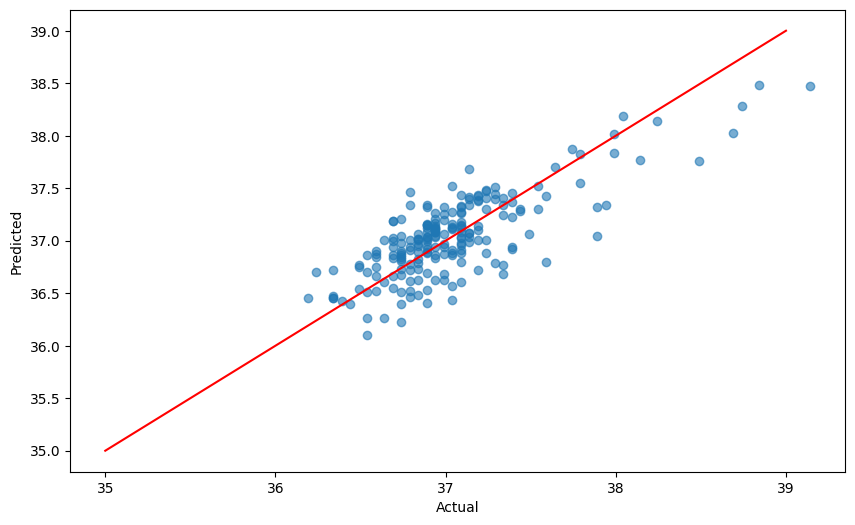

In [20]:
#visualizing the model and the predictions
y_pred = model_2.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(range(35,40), range(35,40), color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### 3.10 Evaluation metrics 

- Calculating evaluation metrics for test data for evaluate the model.

In [21]:
import numpy as np
from scipy.stats import t

# Residual sum of squares (RSS)
RSS = np.sum(np.square(y_test - model_2.predict(X_test)))
print(f"Residual sum of squares (RSS): {RSS}")

# Residual standard error (RSE)
N = X_test.shape[0]
d = X_test.shape[1]
RSE = np.sqrt(RSS/(N-d-1))
print(f"Residual standard error (RSE): {RSE}")

# Mean squared error (MSE)
MSE = np.mean(np.square(y_test - model_2.predict(X_test)))
print(f"Mean squared error (MSE): {MSE}")

# R2 statistic
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
R2 = 1 - RSS/TSS
print(f"R2 statistic: {R2}")

# Standard error for each feature
standard_errors = []
for feature in independent_features_new:
    X_test_feature = X_test[feature]
    X_test_feature_mean = np.mean(X_test_feature)
    X_test_feature_std = np.std(X_test_feature)
    SE2 = X_test_feature_std**2 / np.sum(np.square(X_test_feature - X_test_feature_mean))
    standard_errors.append(np.sqrt(SE2))
    print(f"Standard error for {feature}: {np.sqrt(SE2)}")

# t-statistic for each feature
t_statistics = []
for coef, SE, feature in zip(coefficients_sel, standard_errors, independent_features_new):

    t_stat = coef / (SE**2)
    t_statistics.append(t_stat)
    print(f"t-statistic for {feature}: {t_stat}")

Residual sum of squares (RSS): 15.923399754377385
Residual standard error (RSE): 0.28287291173396434
Mean squared error (MSE): 0.07805588114890875
R2 statistic: 0.6076047374475756
Standard error for T_OR1: 0.07001400420140048
Standard error for T_OR_Max1: 0.07001400420140048
Standard error for T_FHC_Max1: 0.0700140042014005
Standard error for T_FH_Max1: 0.07001400420140048
t-statistic for T_OR1: 41.91338370094872
t-statistic for T_OR_Max1: 71.03215600464588
t-statistic for T_FHC_Max1: -17.07856727893869
t-statistic for T_FH_Max1: 76.81912578132597


- Calculating the p-values for the training dataset.

In [22]:
import pandas as pd
import statsmodels.api as sm


# Add a constant column to the feature matrix (required by statsmodels)
X_train_with_constant = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train_with_constant).fit()

# Get summary statistics of the model
summary = ols_model.summary()

# Extract p-values from the summary for all features
p_values = summary.tables[1].data[1:]

# Create a DataFrame to associate p-values with feature names
p_values_df = pd.DataFrame(p_values, columns=['Feature', 'Coefficient', 'Standard Error', 't-value', 'P-Value', 'Lower CI', 'Upper CI'])
p_values_df['P-Value'] = p_values_df['P-Value'].astype(float)


print(summary)
print(p_values_df)

                            OLS Regression Results                            
Dep. Variable:               aveOralM   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sat, 07 Sep 2024   Prob (F-statistic):          2.11e-183
Time:                        15:32:41   Log-Likelihood:                -200.37
No. Observations:                 814   AIC:                             410.7
Df Residuals:                     809   BIC:                             434.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7936      0.801      8.486      0.0

#### 3.11 Discard of features

- We can reject the features that have p-values grater the 5% based on p-values. Therefore, we can discard the features 'T_OR1', 'T_OR_Max1', 'T_FHC_Max1'.  